In [1]:
!pip install  tensorflow-cpu opencv-python matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.13.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt



In [5]:
img_width = 64
img_height = 64

In [6]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [7]:
train_data_generator = datagen.flow_from_directory(
    directory=r"C:\Users\user\OneDrive\Desktop\CEMA Classifier\cell_images",
    target_size=(img_width, img_height),
    class_mode='binary',
    batch_size=16,
    subset='training'
)


Found 22012 images belonging to 2 classes.


In [8]:
validation_data_generator = datagen.flow_from_directory(
    directory=r"C:\Users\user\OneDrive\Desktop\CEMA Classifier\cell_images", 
    target_size=(img_width, img_height),
    class_mode='binary',
    batch_size=16,
    subset='validation' 
)

Found 5502 images belonging to 2 classes.


In [9]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
validation_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))


model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [13]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [14]:

validation_steps = len(validation_data_generator)  

history = model.fit(
    train_data_generator,
    steps_per_epoch=len(train_data_generator),
    epochs=5,
    validation_data=validation_data_generator, 
    validation_steps=validation_steps 
)


Epoch 1/5
1376/1376 [==============================] - 317s 230ms/step - loss: 0.5007 - accuracy: 0.7524 - val_loss: 0.2312 - val_accuracy: 0.9298
Epoch 2/5
1376/1376 [==============================] - 291s 211ms/step - loss: 0.2260 - accuracy: 0.9233 - val_loss: 0.2157 - val_accuracy: 0.9326
Epoch 3/5
1376/1376 [==============================] - 287s 209ms/step - loss: 0.2028 - accuracy: 0.9294 - val_loss: 0.1984 - val_accuracy: 0.9342
Epoch 4/5
1376/1376 [==============================] - 265s 192ms/step - loss: 0.1984 - accuracy: 0.9277 - val_loss: 0.1954 - val_accuracy: 0.9348
Epoch 5/5
1376/1376 [==============================] - 270s 196ms/step - loss: 0.1843 - accuracy: 0.9358 - val_loss: 0.1875 - val_accuracy: 0.9389


In [17]:
history.history

{'loss': [0.5006772875785828,
  0.2259502410888672,
  0.20275996625423431,
  0.19843733310699463,
  0.18434864282608032],
 'accuracy': [0.7524077892303467,
  0.9232691526412964,
  0.9293566942214966,
  0.9277212619781494,
  0.9357622861862183],
 'val_loss': [0.23123779892921448,
  0.21565763652324677,
  0.19844570755958557,
  0.1953573375940323,
  0.18749594688415527],
 'val_accuracy': [0.9298436641693115,
  0.9325699806213379,
  0.9342057704925537,
  0.9347509741783142,
  0.9389312863349915]}

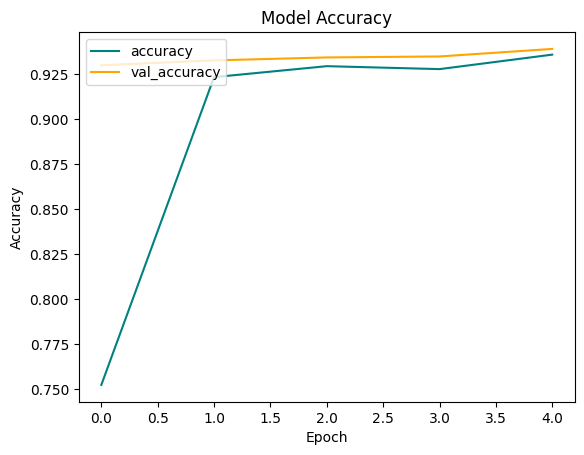

In [23]:
fig_acc = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

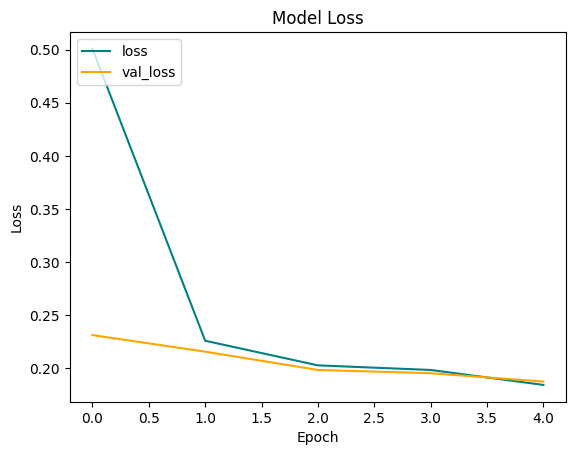

In [22]:
fig_loss = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [24]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('model_results.pdf') as pdf:
    pdf.savefig(fig_acc) 

    pdf.savefig(fig_loss)